In [1]:
import sys
sys.path.insert(0, "..")

import jax
import jax.numpy as jnp
import jax.random
from matplotlib import pyplot as plt

import module.samplers

import numpy as np

In [2]:
def logprob(x):
    return -0.5*jnp.sum((x**2))

In [3]:
rkey = jax.random.PRNGKey(2)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [10]:
sampler = module.samplers.MCMC(logprob, (1,), 1)

In [11]:
sampler.next_element(rkey, jnp.zeros(1,) + 3)

(Array([2.615419], dtype=float32), Array(1, dtype=int32, weak_type=True))

In [12]:
data, ratio = sampler.sample(rkey, jnp.zeros((1,)), 1000)

In [13]:
ratio

Array(0.73800004, dtype=float32, weak_type=True)

In [22]:
data.shape

(1000, 1)

In [23]:
jnp.mean(data)

Array(0.06070487, dtype=float32)

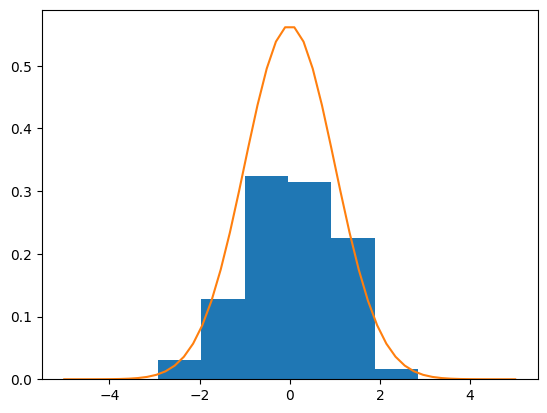

In [24]:
plt.hist(np.array(data), bins = 6, density=True)
xs = np.linspace(-5, 5)
plt.plot(xs, np.exp(-xs**2/2)/np.sqrt(np.pi))

In [10]:
jax.random.split(rkey, 4)

Array([[2285895361, 1501764800],
       [1518642379, 4090693311],
       [ 433833334, 4221794875],
       [ 839183663, 3740430601]], dtype=uint32)

In [11]:
rkey, _ = jax.random.split(rkey)
sampler.sample_chains(rkey, 5, 3000)

Array([[[ 0.45084453],
        [-0.28501752],
        [-0.28501752],
        ...,
        [ 0.22753386],
        [ 0.22753386],
        [-1.1419814 ]],

       [[ 0.17195868],
        [ 0.84488356],
        [-0.30797085],
        ...,
        [ 0.13572386],
        [ 0.13572386],
        [-0.9090505 ]],

       [[ 0.9844918 ],
        [ 0.9844918 ],
        [ 0.9844918 ],
        ...,
        [ 1.5466503 ],
        [ 1.5466503 ],
        [-0.34811792]],

       [[ 0.0260601 ],
        [ 0.0260601 ],
        [ 0.0260601 ],
        ...,
        [ 0.85700834],
        [-0.49117833],
        [-0.49117833]],

       [[ 0.7762034 ],
        [ 0.7762034 ],
        [ 0.7762034 ],
        ...,
        [-0.27883968],
        [-0.27883968],
        [ 0.21876961]]], dtype=float32)

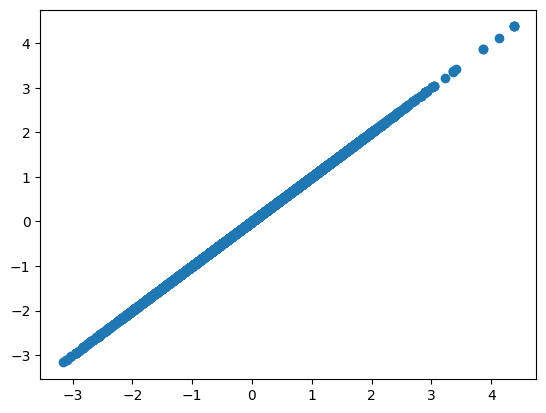

In [12]:
plt.scatter(data[:,0], data[:, 1])

In [13]:
element = jnp.array([0,0,0])

In [14]:
element.shape

(3,)

In [15]:
sampler.propose(rkey, element)

(Array([1278412471, 2182328957], dtype=uint32),
 Array([1.8061804, 1.8061804, 1.8061804], dtype=float32))

In [16]:
sampler.next_element(jax.random.PRNGKey(1), jnp.array([1,8,3]))

Array([1., 8., 3.], dtype=float32)

In [17]:
def f(data, bob):
    next_item = sampler.next_element(data[0], data[1])
    key, _ = jax.random.split(data[0])
    return ((key, next_item), next_item)

In [18]:
x = jax.lax.scan(f, (rkey, jnp.array([0.,0.,0.])), jnp.zeros((5000, 3)))[1]

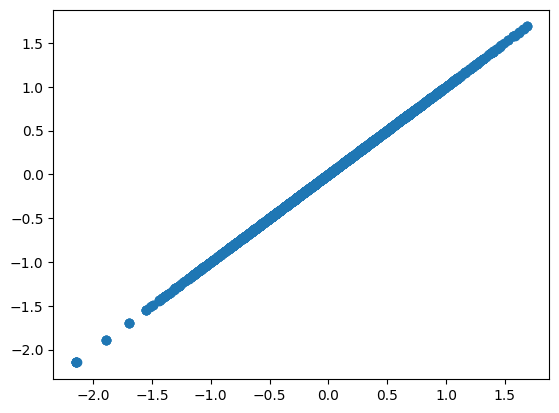

In [19]:
plt.scatter(x[:,0], x[:,1])

In [20]:
jnp.mean(x)

Array(-0.00357173, dtype=float32)